In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NDVI = pd.read_excel("NDvI2011-2020.xlsx")
PET = pd.read_excel("pet_2010_2020_Scale0.1.xlsx", infer_datetime_format=True)
SolRad = pd.read_excel("Srad2010-20.xlsx")
AET = pd.read_excel("aet_2010_2020_Scale0.1.xlsx")
Tmin = pd.read_excel("tmin.xlsx")
Tmax = pd.read_excel("tmax.xlsx")
Tsday = pd.read_excel("surfaceTempDay_re.xlsx")
Tsnight = pd.read_excel("surfaceTempnight.xlsx")
co2 = pd.read_csv("co2_trend_gl_re.txt", delim_whitespace=True)

In [3]:
PAR = np.array(SolRad.values[8 :, 1], dtype=int)/20
NdviArray = np.array(NDVI.values[: -10, 1], dtype=float)
Tavg = (np.array(Tmin.values[8 :, 1], dtype=float) + np.array(Tmax.values[8 :, 1], dtype=float))/20
Tsday_act = np.array(Tsday.values[:, 1], dtype=float)*0.02 - 273.15

In [4]:
W = 0.5 + (np.array(AET.values[17 :,1], dtype=int)/np.array(PET.values[17 :, 1], dtype=int))

In [5]:
W_new = np.zeros(W.size*2, dtype=float)
Tavg_new = np.zeros(Tavg.size*2, dtype=float)
PAR_new = np.zeros(PAR.size*2, dtype=float)
for i in range(Tavg.size):
    W_new[2*i] = W[i]
    Tavg_new[2*i] = Tavg[i]
    PAR_new[i*2] = PAR[i]
    if 2*(i+1)<Tavg_new.size:
        Tavg_new[2*i+1] = (Tavg[i]+Tavg[i+1])/2
        W_new[2*i+1] = (W[i]+W[i+1])/2
        PAR_new[2*i+1] = (PAR[i]+PAR[i+1])/2
Tavg_new[-1] = (Tavg_new[-24]+Tavg_new[-48])/2
W_new[-1] = (W_new[-24]+W_new[-48])/2
PAR_new[-1] = (PAR_new[-24]+PAR_new[-48])/2

W_new = np.zeros(W.size*2, dtype=float)
Tavg_new=np.zeros(Tavg.size*2, dtype=float)
for i in range(Tavg.size):
    Tavg_new[2*i]=Tavg[i]
    Tavg_new[2*i+1]=Tavg[i]
    W_new[2*i] = W[i]
    W_new[2*i+1] = W[i]

In [6]:
Topt = Tavg_new[-6]
Tmon = Tavg_new
T1 = 0.8 + 0.02*Topt - 0.0005*Topt**2
T2 = 1.185/((1+np.exp(0.2*(Topt-10-Tmon)))*(1+np.exp(0.3*(-Topt-10+Tmon))))
LUE = 2.5*T1*T2*W_new

In [7]:
print(np.max(LUE), np.min(LUE), np.average(LUE))

3.66961181614673 0.8927710888749408 2.158079229312122


In [8]:
T2 = 1.185*np.power((1 + np.exp(0.2*(20 - 10 - 9))), -1)*np.power((1 + np.exp(0.3*(-20 - 10 + 9))), -1)

In [9]:
NPP = NdviArray*PAR_new*LUE

In [10]:
print(np.max(NPP), np.min(NPP), np.average(NPP))

200.68601260680234 0.0 63.397375498638404


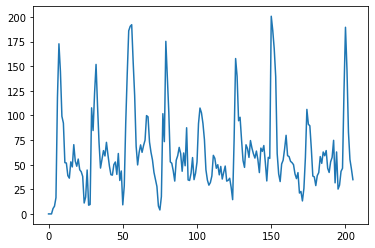

In [11]:
plt.plot(NPP)

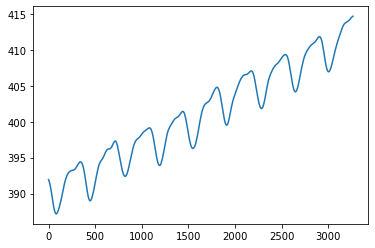

In [30]:
CO2 = co2.values[:, 3]
plt.plot(CO2)

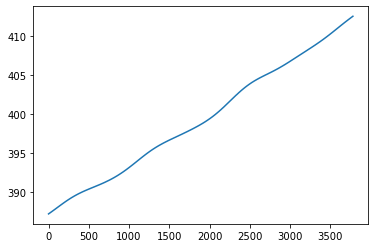

In [25]:
CO2_trend = co2.values[:, 4]
plt.plot(CO2_trend)

In [27]:
co2

,year,month,day,cycle,trend
0,2010,1,1,388.28,387.23
1,2010,1,2,388.30,387.24
2,2010,1,3,388.32,387.25
3,2010,1,4,388.34,387.25
4,2010,1,5,388.36,387.26
...,...,...,...,...,...
3775,2020,5,3,414.67,412.55
3776,2020,5,4,414.68,412.55
3777,2020,5,5,414.69,412.56
3778,2020,5,6,414.70,412.57
